### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [4]:
# Import task2a.csv with 2 rows as a dataframe df1 and task2b.csv with 7 columns as df2 and then merge it into a single data frame df
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv("D:/UWE/Programming for Data Science/Assignment/task2a.csv")
df2=pd.read_csv("D:/UWE/Programming for Data Science/Assignment/task2b.csv")
df=pd.merge(df1,df2)
df.head(5)

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3


### Requirement FR10 - Clean the merged data

In [5]:
# Clean the single merged dataframe by removing all rows from the merged data whose bikes shares value is less than 20.
df=df[df.new_bike_shares>19]
#Removing the season_code column
df=df.drop(columns = ['season_code'])

In [6]:
#Checking for null values present in the data
df.isnull().sum()

timestamp          0
new_bike_shares    0
temperature        0
feels_like_temp    0
humidity           0
wind_speed         0
is_weekend         0
dtype: int64

From the above, there are no null values present in the data

In [7]:
#Checking for duplicate values in the data
df.duplicated().sum()

0

Also, there are not duplicate values present in the data

In [8]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17413
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        17373 non-null  object 
 1   new_bike_shares  17373 non-null  int64  
 2   temperature      17373 non-null  float64
 3   feels_like_temp  17373 non-null  float64
 4   humidity         17373 non-null  float64
 5   wind_speed       17373 non-null  float64
 6   is_weekend       17373 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.1+ MB


All the data are numeric except the timestamp column, the timestamp column will be converted to a datetime

In [9]:
# converting the timestamp column into a datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17413
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        17373 non-null  datetime64[ns]
 1   new_bike_shares  17373 non-null  int64         
 2   temperature      17373 non-null  float64       
 3   feels_like_temp  17373 non-null  float64       
 4   humidity         17373 non-null  float64       
 5   wind_speed       17373 non-null  float64       
 6   is_weekend       17373 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.1 MB


From the above, the timestamp column is now a datetime

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

In [10]:
#Creating a new column for the time of the day
# And adding one to it, to make it more readable (since we have 24 hours in a day and in python, counting starts from 0 )

df['time'] = df['timestamp'].dt.hour + 1

In [11]:
df['time'].value_counts()

17    730
13    729
16    729
19    728
18    728
14    728
15    728
21    727
20    727
10    727
12    727
22    726
7     726
8     726
23    725
11    725
1     724
9     724
2     722
24    722
6     720
5     714
3     713
4     698
Name: time, dtype: int64

C:\Users\Samuel PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


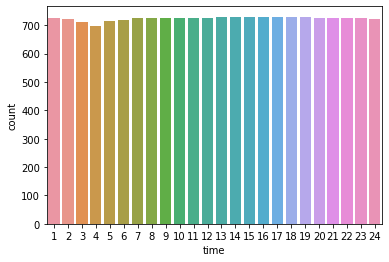

In [12]:
sns.countplot(df['time'])
plt.show()

There are an almost equal distributions for each time of the day

### Requirement FR12 - Compare the distribution of bike shares by time of the week

In [13]:
# creating a new column for the week
df['week'] = df['timestamp'].dt.weekday

In [14]:
df.week.value_counts()

2    2512
4    2502
5    2502
3    2490
0    2476
6    2449
1    2442
Name: week, dtype: int64

C:\Users\Samuel PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


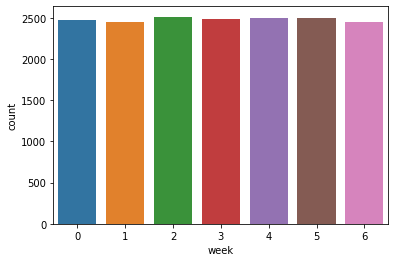

In [15]:
#Since the day of the week is a categorical variable, then it is best countplot
sns.countplot(df['week'])
plt.show()

There are almost equal distributions for each day of the week with slight variations

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

C:\Users\Samuel PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


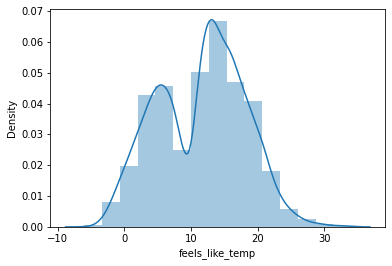

In [16]:
# Selecting the feels_like_temp
sns.distplot(df['feels_like_temp'], bins = 15)
plt.show()

From the above, there is a gradual increment from -10 to 15 and then after 15, there is a gradual decline in the amount of bike share

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

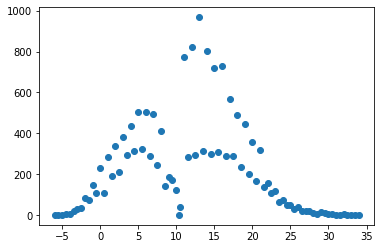

In [17]:
#Checking the scatter plot of the frequency

data = df['feels_like_temp'].value_counts()
data = dict(data)
freq = []
temp = []

for f, t in data.items():
    freq.append(f)
    temp.append(t)
    
plt.scatter(freq, temp)
plt.show()

In [20]:
import numpy as np
np.corrcoef(freq, temp)


array([[ 1.        , -0.19418246],
       [-0.19418246,  1.        ]])

With a correlation coeefficient of -0.19,there is negative correlation

### Introduction
We had a period from 15 February 2022 to 12 May 2022 as we worked on using built-in python functions, NumPy, Pandas and visualizations libraries like Matplotlib, seaborn and SciPy on given CSV files and a list of values to generate outputs such as statistical values like mean, median, standard deviation.
### Challenges
Some of the challenges it has easy as we had to learn and be accustomed to modern technologies in a popular Data Science Language-Python and us going and the use of GitLab for course work submission over the study of the course relating to Programming for Data Science over a brief period. 
Some parts of the task 2 like FR11-14 were difficult for me to accomplish but after much research using lecture materials and documentation was able to figure it out.
How I conducted the tasks
For FR9-I read in the 2 CSV files as data frames and used the pandas merge to add them together.
For FR10-I edited the merged data frame from FR9 and used, other methods existed to get the same outputs in pandas. I used to drop and df[df.new_bike shares>19]
The data set has no null values and no duplicates. To work with the datetime column values in a graph it has to be converted to a datetime first, this is done using the import method in python. (‘User Guide — pandas 1.4.2 documentation’, 2022)
For FR 11-To compare the distribution of bikes shares by time of the day using visualisation of a countplot since we are working with a discrete variable which is time of the day and week, from the visualisation there was even distribution throughout the day. Times of the days were assigned 0 to 24 for readability’s sake. (‘datetime — Basic date and time types — Python 3.10.4 documentation’, 2019), (‘seaborn: statistical data visualization — seaborn 0.11.2 documentation’, 2012)
For FR12, comparing the distribution of bikes shares by the time of the week. Days of the week were assigned 0 to 6 to represent Monday to Sunday, respectively. There was almost even distribution throughout the week also with some slight variations. (‘datetime — Basic date and time types — Python 3.10.4 documentation’, 2019), (‘seaborn: statistical data visualization — seaborn 0.11.2 documentation’, 2012)
For FR13, investigating the effects of “feels like “temperature on the number of bikes shares, a distribution was used to account for the continuous variable with bins of 15 used. From the visualisation, there was a gradual increase in bikes shares like as the temperature rose from -10 to almost midway between 10 to 15, then it fell towards 30. (‘seaborn: statistical data visualization — seaborn 0.11.2 documentation’, 2012)
For FR14, for the hypothesis testing of “feels like “temperature on the number of bikes shares, a scatter plot was plotted to see if there a sort of correlation existed. A value of -0.19 representing a negative correlation which means as one variable increases the other variable decreases and vice versa. (‘numpy.corrcoef — NumPy v1.22 Manual’, 2022)

### Learning Experiences 
In the end, some of the learning outcomes include it has paid off as a positive experience as such an assignment has covered the introduction to python and the basics tools used in python data science like NumPy, Pandas, matplotlib and seaborn and extended to scipy too.
### Conclusion


The assignment has exposed me to a variety of tools especially in pandas, seaborn and matplotlib that I can use if python's built-in functions are not enough.
Next time I will make more full use of resources available online and references brought to my attention during the coursework and get accustomed to them as soon as possible so it becomes first-hand and continue my learning process quickly.

### References
‘datetime — Basic date and time types — Python 3.10.4 documentation’ (2019) Python.org.2019 [online]. Available from: https://docs.python.org/3/library/datetime.html [Accessed 15 May 2022].
‘Matplotlib documentation — Matplotlib 3.5.2 documentation’ (2012) Matplotlib.org.2012 [online]. Available from: https://matplotlib.org/stable/index.html [Accessed 15 May 2022].
‘numpy.corrcoef — NumPy v1.22 Manual’ (2022) Numpy.org.2022 [online]. Available from: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html [Accessed 15 May 2022].
‘SciPy User Guide — SciPy v1.8.0 Manual’ (2022) Scipy.org.2022 [online]. Available from: https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide [Accessed 12 May 2022].
‘seaborn: statistical data visualization — seaborn 0.11.2 documentation’ (2012) Pydata.org.2012 [online]. Available from: https://seaborn.pydata.org/index.html [Accessed 12 May 2022].
‘User Guide — pandas 1.4.2 documentation’ (2022) Pydata.org.2022 [online]. Available from: https://pandas.pydata.org/docs/user_guide/index.html#user-guide [Accessed 12 May 2022].





